# Import modules and data

In [20]:
# %matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
plt.ioff()

### $\mathrm{La_4Ni_3O_{10}}$ data

In [21]:
# Nickel
nilh = np.loadtxt("data/La4Ni3O10_pi_NiLedgeXAS.dat")
nilv = np.loadtxt("data/La4Ni3O10_sigma_NiLedgeXAS.dat")

ni10 = np.empty((nilh.shape[0], 3))
ni10[:, 0] = nilh[:, 0]
ni10[:, 1] = interp1d(
    nilv[:, 0], nilv[:, 2], kind="linear", bounds_error=False, fill_value=np.nan
    )(ni10[:, 0])
ni10[:, 2] = nilh[:, 2]

rng = (ni10[:, 0] > 865) & (ni10[:, 0] < 867)
for i in range(1, 3):
    bkg = np.poly1d(np.polyfit(ni10[rng, 0], ni10[rng, i], 0))(ni10[:, 0])
    ni10[:, i] -= bkg
    ni10[:, i] /= np.nanmean(ni10[ni10[:, 0] > 876, i])
    # ni10[:, i] /= np.nanmax(ni10[ni10[:, 0] > 865, i])


# Oxygen
olh = np.loadtxt("data/La4Ni3O10_pi_OKedgeXAS.dat")
olv = np.loadtxt("data/La4Ni3O10_sigma_OKedgeXAS.dat")

o10 = np.empty((olh.shape[0], 3))
o10[:, 0] = olh[:, 0]
o10[:, 1] = interp1d(
    olv[:, 0], olv[:, 2], kind="linear", bounds_error=False, fill_value=np.nan
    )(o10[:, 0])
o10[:, 2] = olh[:, 2]

### $\mathrm{La_4Ni_3O_{8}}$ data

In [22]:
# Nickel
nilh = np.loadtxt("data/La4Ni3O8_pi_NiLedgeXAS.dat")
nilv = np.loadtxt("data/La4Ni3O8_sigma_NiLedgeXAS.dat")

ni8 = np.empty((nilh.shape[0], 3))
ni8[:, 0] = nilh[:, 0]
ni8[:, 1] = interp1d(
    nilv[:, 0], nilv[:, 2], kind="linear", bounds_error=False, fill_value=np.nan
    )(ni8[:, 0])
ni8[:, 2] = nilh[:, 2]

rng = (ni8[:, 0] > 865) & (ni8[:, 0] < 867)
for i in range(1, 3):
    bkg = np.poly1d(np.polyfit(ni8[rng, 0], ni8[rng, i], 0))(ni8[:, 0])
    ni8[:, i] -= bkg
    ni8[:, i] /= np.nanmean(ni8[ni8[:, 0] > 876, i])
    # ni8[:, i] /= np.nanmax(ni8[ni8[:, 0] > 865, i])
    # ni8[:, i] *= 1.65

# Oxygen
olh = np.loadtxt("data/La4Ni3O8_pi_OKedgeXAS.dat")
olv = np.loadtxt("data/La4Ni3O8_sigma_OKedgeXAS.dat")

o8 = np.empty((olh.shape[0], 3))
o8[:, 0] = olh[:, 0]
o8[:, 1] = interp1d(
    olv[:, 0], olv[:, 2], kind="linear", bounds_error=False, fill_value=np.nan
    )(o8[:, 0])
o8[:, 2] = olh[:, 2]

# XAS plot

In [23]:
fig, ((xasni, xaso), (xldni, xldo)) = plt.subplots(2, 2, figsize=(8,6))

for ax in (xasni, xaso, xldni, xldo):
    ax.tick_params(direction="in", top=True, right=True, labelsize=10)


for ax in (xaso, xasni):
    ax.tick_params(labelbottom=False)

# for ax in (xaso, xldo):
#     ax.tick_params(labelleft=False, labelright=True)
#     ax.yaxis.set_label_position("right")

plt.subplots_adjust(
    top=0.92, bottom=0.1, left=0.1, right=0.98, wspace=0.15, hspace=0
)

### O XAS

In [24]:
plt.sca(xaso)
xaso.clear()
xaso.set_title(r"O $K$ edge", fontsize=12)

plt.plot(
    o10[:, 0], o10[:, 1],
    color="C0",
    ls="-",
    label=r"$\mathrm{La_4Ni_3O_{10}}$ $\sigma$ pol."
)

plt.plot(
    o10[:, 0], o10[:, 2],
    color="C0",
    ls="--",
    label=r"$\mathrm{La_4Ni_3O_{10}}$ $\pi$ pol."
)

plt.plot(
    o8[:, 0], o8[:, 1],
    color="C1",
    ls="-",
    label=r"$\mathrm{La_4Ni_3O_{8}}$ $\sigma$ pol."
)
plt.plot(
    o8[:, 0], o8[:, 2],
    color="C1",
    ls="--",
    label=r"$\mathrm{La_4Ni_3O_{8}}$ $\pi$ pol."
)

plt.xlim(528, 542)
plt.legend(fontsize=10, handlelength=1.5, labelspacing=0.3, handletextpad=0.4)
plt.text(0.05, 0.9, "(b)", transform=xaso.transAxes, fontsize=12)

Text(0.05, 0.9, '(b)')

### O XLD

In [25]:
plt.sca(xldo)
xldo.clear()

plt.plot(
    o10[:, 0], o10[:, 1] - o10[:, 2],
    color="C0",
    label=r"$\mathrm{La_4Ni_3O_{10}}$"
)
plt.plot(
    o8[:, 0], o8[:, 1] - o8[:, 2],
    color="C1",
    label=r"$\mathrm{La_4Ni_3O_{8}}$"
)

plt.xlim(528, 542)
plt.xlabel("Energy (eV)", fontsize=12)

plt.legend(fontsize=10, handlelength=1.5, labelspacing=0.3, handletextpad=0.4)
plt.text(0.05, 0.9, "(d)", transform=xldo.transAxes, fontsize=12)

Text(0.05, 0.9, '(d)')

### Ni XAS

In [26]:

plt.sca(xasni)
xasni.clear()
xasni.set_title(r"Ni $L_2$ edge", fontsize=12)

plt.plot(
    ni10[:, 0], ni10[:, 1],
    color="C0",
    ls="-",
    label=r"$\mathrm{La_4Ni_3O_{10}}$ $\sigma$ pol."
)
plt.plot(
    ni10[:, 0], ni10[:, 2],
    color="C0",
    ls="--",
    label=r"$\mathrm{La_4Ni_3O_{10}}$ $\pi$ pol."
)

plt.plot(
    ni8[:, 0],
    ni8[:, 1],
    color="C1",
    ls="-",
    label=r"$\mathrm{La_4Ni_3O_{8}}$ $\sigma$ pol."
)
plt.plot(
    ni8[:, 0], ni8[:, 2],
    color="C1",
    ls="--",
    label=r"$\mathrm{La_4Ni_3O_{8}}$ $\pi$ pol."
)

plt.xlim(865, 879)
plt.ylim(-1, 13)
plt.ylabel(
    "Normalized XAS (arb. units)", fontsize=12
)
plt.legend(fontsize=10, handlelength=1.5, labelspacing=0.3, handletextpad=0.4)
plt.text(0.05, 0.9, "(a)", transform=xasni.transAxes, fontsize=12)

Text(0.05, 0.9, '(a)')

### Ni XLD

In [27]:
plt.sca(xldni)
xldni.clear()

plt.plot(
    ni10[:, 0], ni10[:, 1] - ni10[:, 2],
    label=r"$\mathrm{La_4Ni_3O_{10}}$"

)
plt.plot(
    ni8[:, 0], ni8[:, 1] - ni8[:, 2],
    label=r"$\mathrm{La_4Ni_3O_{8}}$"
)

plt.xlim(865, 879)
plt.ylim(-2, 3.5)
plt.ylabel(
    "XLD (arb. units)", fontsize=12,
)
plt.xlabel("Energy (eV)", fontsize=12)
plt.legend(fontsize=10, handlelength=1.5, labelspacing=0.3, handletextpad=0.4)
plt.text(0.05, 0.9, "(c)", transform=xldni.transAxes, fontsize=12)

Text(0.05, 0.9, '(c)')

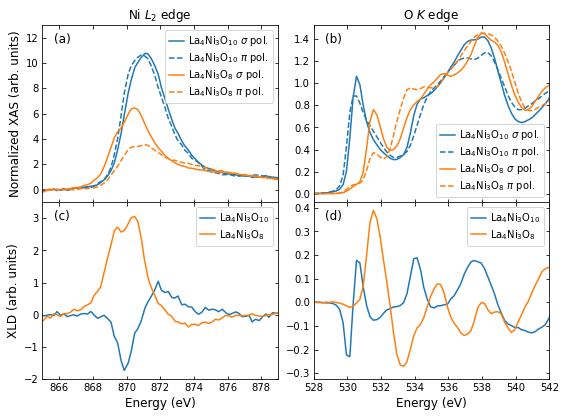

In [28]:
plt.show()